In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt 
from sklearn import tree

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [6]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
indep=dataset[['age', 'sex_male', 'bmi', 'children', 'smoker_yes']] 
dep=dataset[['charges']]

In [8]:
indep

,age,sex_male,bmi,children,smoker_yes
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(indep, dep, test_size=0.30, random_state=0)

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
regressor = regressor.fit(X_train, Y_train)

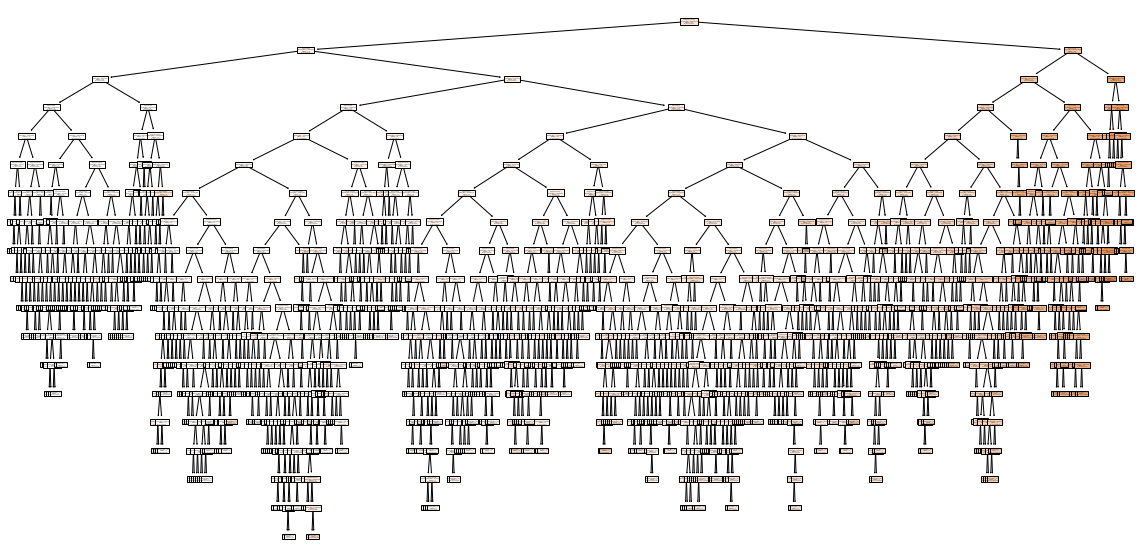

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=indep.columns)
plt.show()


In [22]:
Y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r_score = r2_score(Y_test, Y_pred)
print(f"R² value: {r_score}")


R² value: 0.745671000599289
